# Нелинейная задача теплопроводности для стержня (вариант m=2, n=2)

Этот ноутбук содержит постановку задачи, аналитическое решение модельной задачи и численные решения
модельной и исходной задач для варианта **m = 2, n = 2**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Общие параметры варианта (m = 2, n = 2)
l = 1.0
l1 = 0.5
l2 = 1.0

a = 1.0
b = 1.0
sigma = 1.0

rho = 2.0
c = 0.25

mu = 0.5   # фоновая температура
nu = 2.0   # повышенная температура

# Для модельной задачи k(u) = a = const, уравнение u_t = kappa_linear * u_xx
kappa_linear = a / (c * rho)
print("kappa_linear =", kappa_linear)

kappa_linear = 2.0


## 1. Постановка исходной задачи

Рассматривается тонкий стержень длины $l = 1$ с теплоизолированной боковой поверхностью.
Температура $u(x,t)$ удовлетворяет нелинейному уравнению

$$
u_t = 2\,\frac{\partial}{\partial x}\big((1+u)\,u_x\big), \quad 0 < x < 1,\ t>0.
$$

Начальное условие (разрывное):

$$
u(x,0) =
\begin{cases}
0.5, & 0 \le x < 0.5,\\
2,   & 0.5 \le x \le 1.
\end{cases}
$$

Граничные условия для варианта $n = 2$:

* на левом конце $x = 0$ тепловой поток равен нулю, то есть $u_x(0,t) = 0$;
* на правом конце $x = 1$ задана постоянная температура $u(1,t) = 0.5$.

Цель — по численному решению определить время $T$, при котором распределение температуры по стержню становится
практически постоянным, в смысле критерия

$$
\delta(t) = \frac{\max_x u(x,t) - \min_x u(x,t)}{\min_x u(x,t)} \le 0.05.
$$

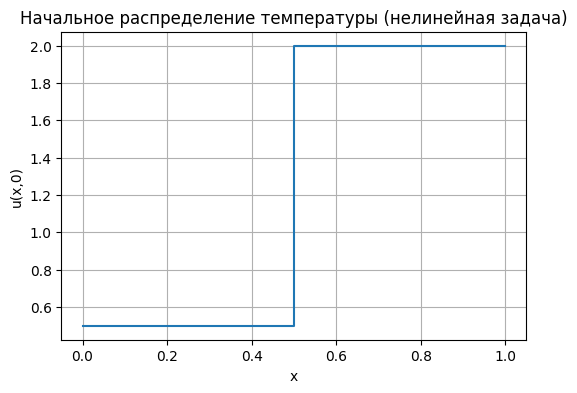

In [2]:
def u0_nonlinear(x):
    x = np.asarray(x)
    return np.where(x < l1, mu, nu)

xs_plot = np.linspace(0.0, l, 201)
u_init = u0_nonlinear(xs_plot)

plt.figure(figsize=(6, 4))
plt.step(xs_plot, u_init, where="post")
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.title("Начальное распределение температуры (нелинейная задача)")
plt.grid(True)
plt.show()

## 2. Модельная задача с постоянным коэффициентом теплопроводности

Модельная (линейная) задача получается, если заменить $k(u)$ константой $a$:

$$
u_t = 2 u_{xx}, \quad 0 < x < 1,\ t>0,
$$

с теми же граничными условиями

$$
u_x(0,t) = 0, \qquad u(1,t) = v,
$$

и специальным начальным условием

$$
u(x,0) = v + X_1(x),
$$

где $v = \nu$ и $X_1(x)$ — первая собственная функция для задачи

$$
X'' + \lambda^2 X = 0, \quad X'(0) = 0, \quad X(1) = 0.
$$

Отсюда берём

$$
\lambda_1 = \frac{\pi}{2}, \qquad X_1(x) = \cos \frac{\pi x}{2}.
$$

Решение модельной задачи:

$$
u(x,t) = v + X_1(x)\, e^{-2 \lambda_1^2 t}.
$$

Для критерия выравнивания температуры в модельной задаче:

$$
\delta(t) = \frac{\max_x u(x,t) - \min_x u(x,t)}{\min_x u(x,t)}.
$$

На отрезке $[0,1]$ функция $\cos(\pi x/2)$ изменяется от $1$ до $0$, поэтому

$$
\max_x u = v + e^{-2 \lambda_1^2 t}, \qquad \min_x u = v,
$$

и

$$
\delta(t) = \frac{e^{-2 \lambda_1^2 t}}{v}.
$$

Для $v = 2$ получаем

$$
\delta(t) = \frac{1}{2} e^{-2 \lambda_1^2 t}.
$$

Из условия $\delta(T) \le 0.05$:

$$
\frac{1}{2} e^{-2 \lambda_1^2 T} \le 0.05
\quad \Rightarrow \quad
e^{-2 \lambda_1^2 T} \le 0.1
\quad \Rightarrow \quad
T \ge \frac{2 \ln 10}{\pi^2}.
$$

Обозначим это аналитическое время как $T_{\text{analytic}}$.

In [3]:
v = nu  # уровень температуры в модельной задаче

lambda1 = np.pi / 2.0

def X1(x):
    return np.cos(lambda1 * x)

def u_linear_analytic(x, t):
    x = np.asarray(x)
    return v + X1(x) * np.exp(-2.0 * lambda1**2 * t)

def delta_linear_analytic(t):
    max_u = v + np.exp(-2.0 * lambda1**2 * t)
    min_u = v
    return (max_u - min_u) / min_u

eps = 0.05
T_analytic = (2.0 * np.log(10.0)) / (np.pi**2)
print("Аналитическое время выравнивания T_analytic ≈", T_analytic)

ts = np.linspace(0.0, T_analytic, 5)
for t in ts:
    print(f"delta(t={t:.3f}) = {delta_linear_analytic(t):.4f}")

Аналитическое время выравнивания T_analytic ≈ 0.46660129411871826
delta(t=0.000) = 0.5000
delta(t=0.117) = 0.2812
delta(t=0.233) = 0.1581
delta(t=0.350) = 0.0889
delta(t=0.467) = 0.0500


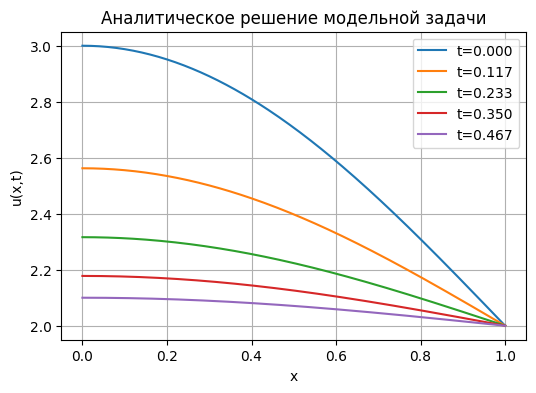

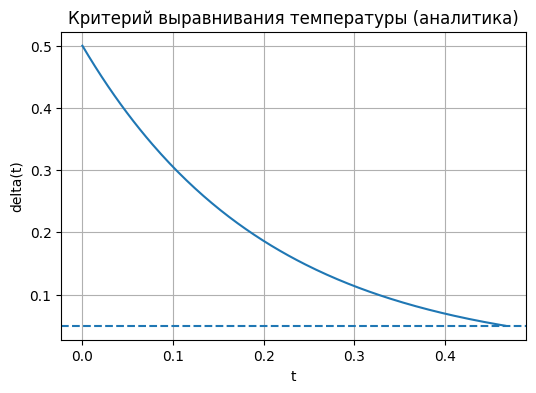

In [4]:
xs = np.linspace(0.0, l, 201)
times = [0.0, 0.25 * T_analytic, 0.5 * T_analytic, 0.75 * T_analytic, T_analytic]

plt.figure(figsize=(6, 4))
for t in times:
    plt.plot(xs, u_linear_analytic(xs, t), label=f"t={t:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Аналитическое решение модельной задачи")
plt.legend()
plt.grid(True)
plt.show()

ts_fine = np.linspace(0.0, T_analytic, 200)
deltas = delta_linear_analytic(ts_fine)

plt.figure(figsize=(6, 4))
plt.plot(ts_fine, deltas)
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Критерий выравнивания температуры (аналитика)")
plt.grid(True)
plt.show()

## 3. Численное решение модельной задачи

Используем равномерную сетку по $x$ и явную разностную схему для уравнения

$$
u_t = 2 u_{xx}.
$$

Пусть $x_i = i h$, $i = 0,\dots,N$, $t^n = n \tau$. Тогда схема для внутренних узлов

$$
u_i^{n+1} = u_i^n + r\,(u_{i+1}^n - 2 u_i^n + u_{i-1}^n),
\quad r = \frac{\kappa_{\text{linear}} \tau}{h^2}.
$$

Границы:

* $u_x(0,t) = 0 \Rightarrow u_0^n = u_1^n$,
* $u(1,t) = v \Rightarrow u_N^n = v$.

Критерий выравнивания тот же:

$$
\delta^n = \frac{\max_i u_i^n - \min_i u_i^n}{\min_i u_i^n} \le 0.05.
$$

In [5]:
def solve_linear_model(nx=101, dt=None, t_max=2.0, v=v, store_every=100):
    x = np.linspace(0.0, l, nx)
    h = x[1] - x[0]
    if dt is None:
        dt = 0.25 * h**2 / kappa_linear
    r = kappa_linear * dt / h**2
    print(f"nx={nx}, h={h:.4e}, dt={dt:.4e}, r={r:.4e}")

    u = v + X1(x)

    times = [0.0]
    snapshots = [u.copy()]
    deltas = [(u.max() - u.min()) / u.min()]

    t = 0.0
    step = 0
    while t < t_max:
        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + r * (u[2:] - 2.0 * u[1:-1] + u[:-2])
        u_new[0] = u_new[1]
        u_new[-1] = v

        u = u_new
        t += dt
        step += 1

        if step % store_every == 0:
            times.append(t)
            snapshots.append(u.copy())
            delta = (u.max() - u.min()) / u.min()
            deltas.append(delta)
            if delta <= eps:
                break

    times = np.array(times)
    snapshots = np.array(snapshots)
    deltas = np.array(deltas)
    T_num = times[-1]
    print(f"Численное время выравнивания (линейная модель): T_num ≈ {T_num}")
    return x, times, snapshots, deltas

nx=101, h=1.0000e-02, dt=1.2500e-05, r=2.5000e-01
Численное время выравнивания (линейная модель): T_num ≈ 0.46250000000042296


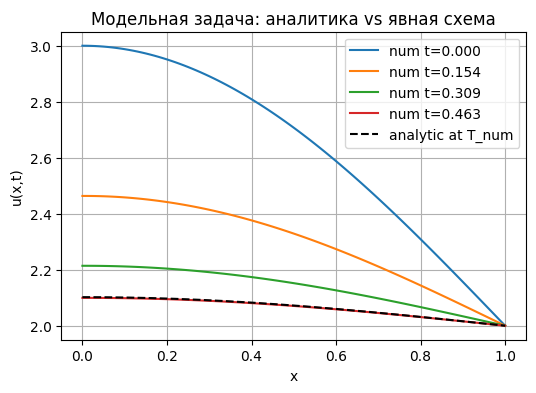

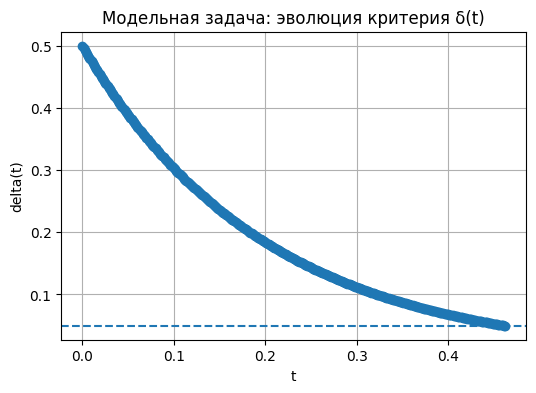

T_analytic = 0.46660129411871826
T_num_linear = 0.46250000000042296


In [6]:
x_lin, t_lin, U_lin, delta_lin = solve_linear_model()

plt.figure(figsize=(6, 4))
indices = [0, len(t_lin)//3, 2 * len(t_lin)//3, len(t_lin) - 1]
for k in indices:
    plt.plot(x_lin, U_lin[k], label=f"num t={t_lin[k]:.3f}")
plt.plot(xs, u_linear_analytic(xs, t_lin[-1]), "k--", label="analytic at T_num")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Модельная задача: аналитика vs явная схема")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_lin, delta_lin, marker="o")
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Модельная задача: эволюция критерия δ(t)")
plt.grid(True)
plt.show()

print("T_analytic =", T_analytic)
print("T_num_linear =", t_lin[-1])

## 4. Численное решение исходной нелинейной задачи

Теперь решаем исходное уравнение

$$
u_t = 2\,\partial_x \big((1+u)\,u_x\big)
$$

с разрывным начальным условием и теми же граничными условиями.

Используем потоковую форму:

$$
q = (1+u)\,u_x, \qquad u_t = 2 q_x.
$$

На равномерной сетке

$$
q_{i+1/2} = k_{i+1/2} \frac{u_{i+1} - u_i}{h}, \quad
k_{i+1/2} = 1 + \frac{u_{i+1} + u_i}{2},
$$

а дивергенция потока в узле

$$
(q_x)_i \approx \frac{q_{i+1/2} - q_{i-1/2}}{h}.
$$

Границы:

* $u_x(0,t) = 0 \Rightarrow u_0^n = u_1^n$,
* $u(1,t) = 0.5 \Rightarrow u_N^n = \mu$.

Используем явную схему по времени и тот же критерий выравнивания $\delta^n \le 0.05$.

In [7]:
def solve_nonlinear(nx=101, dt=None, t_max=2.0, store_every=100):
    x = np.linspace(0.0, l, nx)
    h = x[1] - x[0]
    if dt is None:
        k_max = 1.0 + max(mu, nu)
        kappa_eff = 2.0 * k_max
        dt = 0.25 * h**2 / kappa_eff
    print(f"nx={nx}, h={h:.4e}, dt={dt:.4e}")

    u = u0_nonlinear(x)

    times = [0.0]
    snapshots = [u.copy()]
    deltas = [(u.max() - u.min()) / u.min()]

    t = 0.0
    step = 0
    while t < t_max:
        u[0] = u[1]
        u[-1] = mu

        k_right = 1.0 + 0.5 * (u[1:] + u[:-1])
        flux_right = k_right * (u[1:] - u[:-1]) / h

        div = np.zeros_like(u)
        div[1:-1] = (flux_right[1:] - flux_right[:-1]) / h

        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + 2.0 * dt * div[1:-1]
        u_new[0] = u_new[1]
        u_new[-1] = mu

        u = u_new
        t += dt
        step += 1

        if step % store_every == 0:
            times.append(t)
            snapshots.append(u.copy())
            delta = (u.max() - u.min()) / u.min()
            deltas.append(delta)
            if delta <= eps:
                break

    times = np.array(times)
    snapshots = np.array(snapshots)
    deltas = np.array(deltas)
    T_num = times[-1]
    print(f"Численное время выравнивания (нелинейная задача): T_num ≈ {T_num}")
    return x, times, snapshots, deltas

nx=101, h=1.0000e-02, dt=4.1667e-06
Численное время выравнивания (нелинейная задача): T_num ≈ 0.39958333333428697


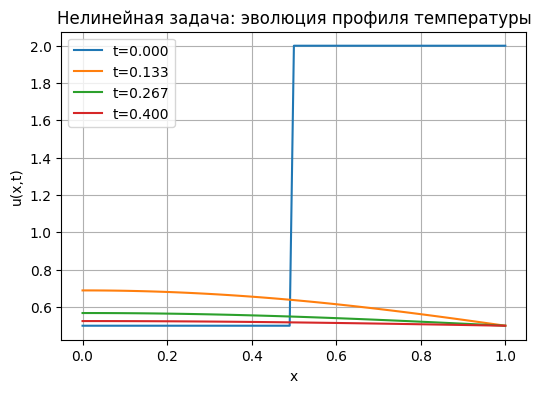

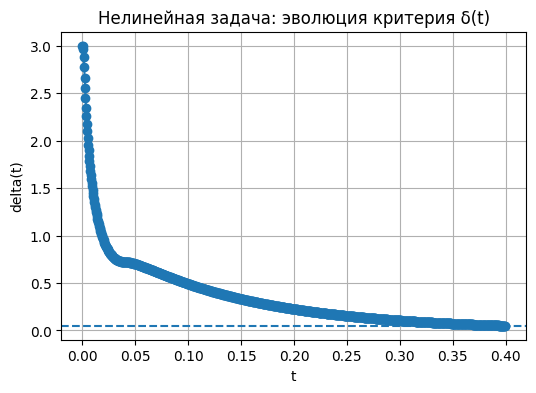

T_nonlin = 0.39958333333428697


In [8]:
x_non, t_non, U_non, delta_non = solve_nonlinear(t_max=2.0)

plt.figure(figsize=(6, 4))
indices = [0, len(t_non)//3, 2 * len(t_non)//3, len(t_non) - 1]
for k in indices:
    plt.plot(x_non, U_non[k], label=f"t={t_non[k]:.3f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Нелинейная задача: эволюция профиля температуры")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_non, delta_non, marker="o")
plt.axhline(eps, linestyle="--")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Нелинейная задача: эволюция критерия δ(t)")
plt.grid(True)
plt.show()

T_nonlin = t_non[-1]
print("T_nonlin =", T_nonlin)

## 5. Сравнение модельной и исходной задач

Сравним распределения температуры по стержню в момент выравнивания и времена выравнивания
для трёх случаев:

1. Аналитическое решение модельной задачи.
2. Численное решение модельной задачи.
3. Численное решение исходной нелинейной задачи.

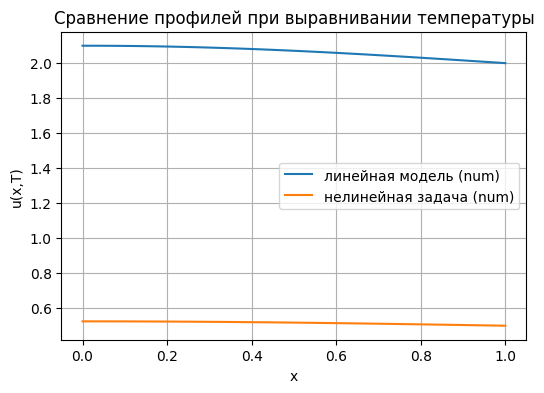

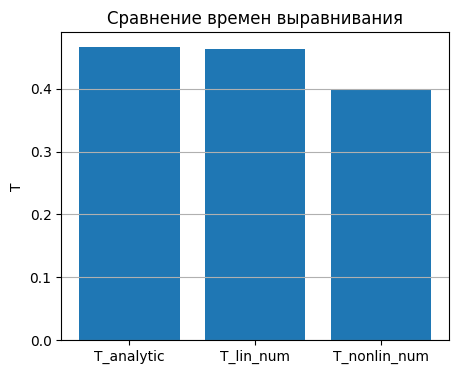

{'T_analytic': 0.46660129411871826, 'T_lin_num': 0.46250000000042296, 'T_nonlin': 0.39958333333428697}


In [9]:
plt.figure(figsize=(6, 4))
plt.plot(x_lin, U_lin[-1], label="линейная модель (num)")
plt.plot(x_non, U_non[-1], label="нелинейная задача (num)")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.title("Сравнение профилей при выравнивании температуры")
plt.legend()
plt.grid(True)
plt.show()

labels = ["T_analytic", "T_lin_num", "T_nonlin_num"]
values = [T_analytic, t_lin[-1], T_nonlin]

plt.figure(figsize=(5, 4))
plt.bar(labels, values)
plt.ylabel("T")
plt.title("Сравнение времен выравнивания")
plt.grid(axis="y")
plt.show()

print({
    "T_analytic": float(T_analytic),
    "T_lin_num": float(t_lin[-1]),
    "T_nonlin": float(T_nonlin),
})

## 6. Выводы

* Сформулирована исходная нелинейная краевая задача теплопроводности для стержня (вариант $m = 2, n = 2$).
* Для модельной задачи с постоянным коэффициентом теплопроводности получено аналитическое решение и найдено
  время выравнивания температуры $T_{\text{analytic}}$.
* Построено численное решение модельной задачи явной разностной схемой и показано согласие с аналитикой.
* Численно решена исходная нелинейная задача с разрывным начальным условием, найдено время выравнивания
  температуры и показана эволюция профилей температуры.
* Сравнены времена выравнивания и формы профилей для линейной модельной и нелинейной задач, что позволяет
  оценить влияние нелинейности коэффициента теплопроводности $k(u) = 1 + u$.

## 7. Дополнительный график: аналитика vs численное решение модельной задачи

На этом графике для одних и тех же моментов времени $t$ одновременно изображены:
* численное решение линейной модельной задачи (точки/сплошная линия);
* аналитическое решение для тех же $t$ (штриховая линия).

Так наглядно видно, что решения практически совпадают.

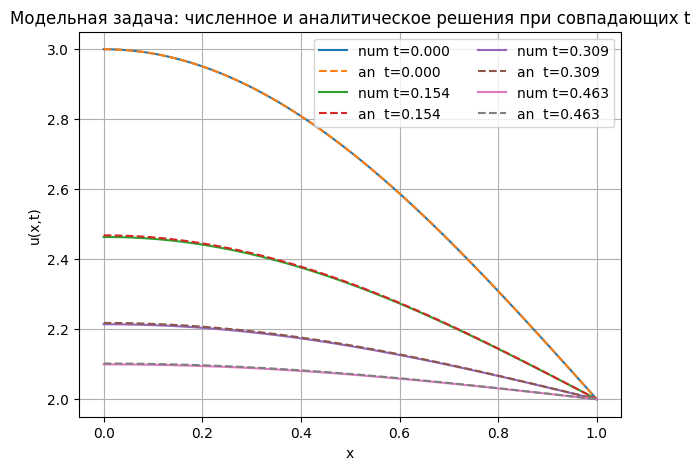

In [10]:
# Сравнение аналитического и численного решения модельной задачи
# в одни и те же моменты времени

plt.figure(figsize=(7, 5))

# несколько характерных моментов времени
indices = [0, len(t_lin)//3, 2 * len(t_lin)//3, len(t_lin) - 1]
indices = sorted(set(indices))  # на всякий случай

for k in indices:
    t = t_lin[k]
    u_num = U_lin[k]
    u_an = u_linear_analytic(x_lin, t)
    plt.plot(x_lin, u_num, label=f"num t={t:.3f}")
    plt.plot(x_lin, u_an, '--', label=f"an  t={t:.3f}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Модельная задача: численное и аналитическое решения при совпадающих t")
plt.grid(True)
plt.legend(ncol=2)
plt.show()